In [26]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import time

from netCDF4 import Dataset

In [27]:
lat_location = 47.39277 #Aarau   #45.897970 #tessin zum testen      
lon_location = 8.04385 #Aarau    #8.986362  #tessin zum testen            

In [28]:
def find_precipitation(year,min_index_lon,min_index_lat):

    #open file
    path = "swisstransfer_945ae19d-7035-4605-ac93-d08bb1ce453d/RhiresM_1961_2019_ch01r.swisscors/RhiresM_ch01r.swisscors_{Y}01010000_{Y}12010000.nc".format(Y=year)
    meteoswiss_data = Dataset(path)

    #creating a List and adding the Value of the same messurment point to it
    
    timeseries = []
    precipitation = meteoswiss_data.variables['RhiresM']

    for month in range(0,12):
        timeseries.append(precipitation[month][min_index_lon][min_index_lat])
    return(timeseries)

    #close netcdf
    meteoswiss_data.close()


In [29]:
def find_temperatur(year,min_index_lon,min_index_lat):

#uncomment next 2 Lines if the file 1980 is missing
    #if year == 1980: 
    #    return([0,0,0,0,0,0,0,0,0,0,0,0]) #file for 1980 is missing 

    #open file
    path = "swisstransfer_945ae19d-7035-4605-ac93-d08bb1ce453d/TabsM_1961_2017_ch01r.swisscors/TabsM_ch01r.swisscors_{Y}01010000_{Y}12010000.nc".format(Y=year)
    meteoswiss_data = Dataset(path)

    #creating a List and adding the Value of the same messurment point to it
    
    timeseries = []
    precipitation = meteoswiss_data.variables['TabsM']

    for month in range(0,12):
        timeseries.append(precipitation[month][min_index_lat][min_index_lon])
    return(timeseries)

    #close netcdf
    meteoswiss_data.close()

Die netCDf enthalten Messdaten die in einem Gitternetz über der Schweiz liegen. Um für belibige Koordinaten die Messwerte zu erhalten, muss zuerst der nächste Messpunkt gefunden werden. Für zusätzliche Komplexität sorgt, dass die Messdaten anhand von den Schweizer Koordinaten abgelegt wurden und in diesem Notebook "normale" Koordinaten verwenden.

In [30]:
starttime = time.time()
path = "swisstransfer_945ae19d-7035-4605-ac93-d08bb1ce453d/RhiresM_1961_2019_ch01r.swisscors/RhiresM_ch01r.swisscors_196101010000_196112010000.nc"
meteoswiss_data = Dataset(path)

# read latitutde and longitude variable
lat = meteoswiss_data.variables['lat'][:] 
lon = meteoswiss_data.variables['lon'][:]

#calculate the min distance of a measurement station
sq_distance = ((lat_location-lat)**2)+((lon_location-lon)**2)
min_sq_distance = sq_distance.min()

#find the index of the array with the smallest distance
index = ma.where(sq_distance == sq_distance.min())
min_index_lat = index[0][0]
min_index_lon = index[1][0]

#extract the precipitation for all years and saving them to a list
precipitation_year = []
for year in range(1961,2020):
    precipitation_year = precipitation_year + find_precipitation(year,min_index_lat,min_index_lon)

#creating a panda with the precipitation for the city
data_range = pd.date_range(start = '1961', end= '2020', freq='M')
timeseries_precipitation = pd.DataFrame(precipitation_year, columns = ['precipitation'], index = data_range)
print(timeseries_precipitation)
print("Time:", time.time()-starttime,"sekunden")

precipitation
1961-01-31      71.597473
1961-02-28     104.650116
1961-03-31      36.955872
1961-04-30      89.006508
1961-05-31      87.217812
...                   ...
2019-08-31     102.734764
2019-09-30      62.589642
2019-10-31     116.482704
2019-11-30      72.834213
2019-12-31      92.661934

[708 rows x 1 columns]
Time: 1.04636812210083 sekunden


In [31]:
starttime = time.time()
path = "swisstransfer_945ae19d-7035-4605-ac93-d08bb1ce453d/TabsM_1961_2017_ch01r.swisscors/TabsM_ch01r.swisscors_196101010000_196112010000.nc"
meteoswiss_data = Dataset(path)

# read latitutde and longitude variable
lat = meteoswiss_data.variables['lat'][:] 
lon = meteoswiss_data.variables['lon'][:]

#calculate the min distance of a measurement station
sq_distance = ((lat_location-lat)**2)+((lon_location-lon)**2)
min_sq_distance = sq_distance.min()

#find the index of the array with the smallest distance
index = ma.where(sq_distance == sq_distance.min())
min_index_lat = index[0][0]
min_index_lon = index[1][0]

#extract the precipitation for all years and saving them to a list
temperatur_year = []

for year in range(1961,2018):
    temperatur_year = temperatur_year + find_temperatur(year,min_index_lon,min_index_lat)

#creating a panda with the precipitation for the city
data_range = pd.date_range(start = '1961', end= '2018', freq='M')
timeseries_temp = pd.DataFrame(temperatur_year, columns = ['temperatur'], index = data_range)
print(timeseries_temp)
print("Time:", time.time()-starttime,"sekunden")

temperatur
1961-01-31    0.212831
1961-02-28    4.317359
1961-03-31    5.815548
1961-04-30   10.831324
1961-05-31   11.621837
...                ...
2017-08-31   19.643940
2017-09-30   13.246844
2017-10-31   10.822061
2017-11-30    4.727308
2017-12-31    1.819763

[684 rows x 1 columns]
Time: 0.8137569427490234 sekunden


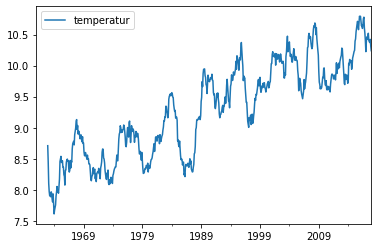

In [42]:
timeseries_temp.rolling(24).mean().plot(kind='line')


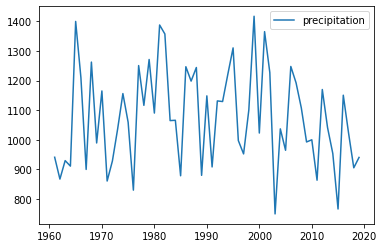

In [41]:
timeseries_precipitation.groupby([(timeseries_precipitation.index.year)]).sum().plot(kind='line')